# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVABLE TRENDS:
In reviewing the data there appears to be a higher temperature for citites closer to the equator and lower temps for citites farther away. 
For Humidity, Wind Speed and Cloudiness there doesn't appear to be a strong correlation based on nearness to or distantance from the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
url = "api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#url 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
#creating sample list of cities to use instead of calling all for testing. remove before final push & to test full file
small_cities = cities[:55]
print(small_cities)

['rikitea', 'pangkalanbuun', 'albany', 'padang', 'taolanaro', 'formoso do araguaia', 'kahului', 'busselton', 'hobart', 'ola', 'guerrero negro', 'tessalit', 'punta arenas', 'mataura', 'tuatapere', 'naze', 'ballina', 'xining', 'kapaa', 'peace river', 'ekibastuz', 'makat', 'tuktoyaktuk', 'atuona', 'kaeo', 'lavrentiya', 'yellowknife', 'khatanga', 'airai', 'pathein', 'spokane', 'carnarvon', 'ushuaia', 'fiche', 'nouadhibou', 'oranjemund', 'bethel', 'hithadhoo', 'mahebourg', 'monterey', 'gao', 'avarua', 'hermanus', 'torbay', 'port elizabeth', 'nguiu', 'samarai', 'vila velha', 'iqaluit', 'provideniya', 'ejura', 'klaksvik', 'cape town', 'porto novo', 'sentyabrskiy']


In [5]:

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#lists to be populated w/ weather data
city_name = []
country = []
latitude =[]
longitude = []
date = []
temperature = []
wind_speed = []
cloud_cover = []
humidity = []



counter = 1

#for city in small_cities:   # used this smaller list for testing remove and use for city in cities for prod

for city in cities:
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cloud_cover.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        
        print(f"city  {counter} | {city}")
        #print(f"{url}&q={city}")
        
        counter = counter + 1
        time.sleep(1.05)
    except:
        
        
        print("No city found. Skipping...")
        
    continue
print("All Done!")




city  1 | rikitea
city  2 | pangkalanbuun
city  3 | albany
city  4 | padang
No city found. Skipping...
No city found. Skipping...
city  5 | kahului
city  6 | busselton
city  7 | hobart
city  8 | ola
city  9 | guerrero negro
city  10 | tessalit
city  11 | punta arenas
city  12 | mataura
city  13 | tuatapere
city  14 | naze
city  15 | ballina
city  16 | xining
city  17 | kapaa
city  18 | peace river
city  19 | ekibastuz
city  20 | makat
city  21 | tuktoyaktuk
city  22 | atuona
city  23 | kaeo
city  24 | lavrentiya
city  25 | yellowknife
city  26 | khatanga
city  27 | airai
city  28 | pathein
city  29 | spokane
city  30 | carnarvon
city  31 | ushuaia
city  32 | fiche
city  33 | nouadhibou
city  34 | oranjemund
city  35 | bethel
city  36 | hithadhoo
city  37 | mahebourg
city  38 | monterey
city  39 | gao
city  40 | avarua
city  41 | hermanus
city  42 | torbay
city  43 | port elizabeth
No city found. Skipping...
city  44 | samarai
city  45 | vila velha
city  46 | iqaluit
city  47 | providen

city  359 | powell river
city  360 | avera
city  361 | liaozhong
city  362 | la ronge
city  363 | cururupu
city  364 | moranbah
city  365 | santiago del estero
city  366 | north platte
No city found. Skipping...
city  367 | fare
city  368 | tuy hoa
city  369 | ishigaki
city  370 | vostok
No city found. Skipping...
city  371 | limon
city  372 | matay
city  373 | kurumkan
city  374 | petropavlovsk-kamchatskiy
city  375 | totskoye
city  376 | kristiansund
city  377 | wajima
city  378 | balkhash
city  379 | griffith
city  380 | pyaozerskiy
city  381 | innisfail
No city found. Skipping...
city  382 | mayya
city  383 | am timan
city  384 | karratha
city  385 | altay
city  386 | si bun ruang
city  387 | uribia
No city found. Skipping...
city  388 | bambous virieux
city  389 | mayumba
city  390 | bone
city  391 | margate
city  392 | rzhanitsa
city  393 | kaspiysk
city  394 | flin flon
city  395 | isangel
city  396 | emmett
city  397 | ust-tsilma
city  398 | busayra
city  399 | port-gentil
city

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#setup dataframe
city_df = pd.DataFrame({ "City": city_name, "Cloudiness": cloud_cover, "Country": country,
                        "Humidity": humidity, "Lat": latitude, "Long": longitude,
                       "Max Temp": temperature, "Wind": wind_speed, "Date": date})


city_df.to_csv('../output_data/city_df.csv')


In [7]:
city_df

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind,Date
0,Rikitea,46,PF,68,-23.1203,-134.9692,77.74,7.38,1643725051
1,Pangkalanbuun,94,ID,83,-2.6833,111.6167,78.62,3.80,1643725052
2,Albany,12,US,80,42.6001,-73.9662,26.15,3.36,1643725054
3,Padang,100,ID,87,-0.9492,100.3543,77.85,1.61,1643725055
4,Kahului,0,US,80,20.8947,-156.4700,67.68,3.44,1643725013
...,...,...,...,...,...,...,...,...,...
567,Acapulco de Juárez,0,MX,83,16.8634,-99.8901,73.22,0.00,1643725845
568,Malegaon,0,IN,22,20.5500,74.5333,75.22,6.51,1643725847
569,Bull Savanna,2,JM,65,17.8868,-77.5902,77.05,4.90,1643725848
570,Görele,100,TR,83,41.0308,39.0031,45.84,7.27,1643725850


In [8]:
len(latitude)


572

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df.loc[city_df["Humidity"]> 100] ["Humidity"].count()
# when ran there were no cities with > 100 humidity

0

In [10]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = city_df[city_df.Humidity > 100].index
humid_100


Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_city_df = city_df.loc[city_df["Humidity"] < 100]
clean_city_df


,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind,Date
0,Rikitea,46,PF,68,-23.1203,-134.9692,77.74,7.38,1643725051
1,Pangkalanbuun,94,ID,83,-2.6833,111.6167,78.62,3.80,1643725052
2,Albany,12,US,80,42.6001,-73.9662,26.15,3.36,1643725054
3,Padang,100,ID,87,-0.9492,100.3543,77.85,1.61,1643725055
4,Kahului,0,US,80,20.8947,-156.4700,67.68,3.44,1643725013
...,...,...,...,...,...,...,...,...,...
567,Acapulco de Juárez,0,MX,83,16.8634,-99.8901,73.22,0.00,1643725845
568,Malegaon,0,IN,22,20.5500,74.5333,75.22,6.51,1643725847
569,Bull Savanna,2,JM,65,17.8868,-77.5902,77.05,4.90,1643725848
570,Görele,100,TR,83,41.0308,39.0031,45.84,7.27,1643725850


In [12]:
#count for clean city df
#len(clean_city_df)


In [13]:
#len(city_df)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The below scatter plot shows the relationship between Latitude and Max TempF. Notice how when you move farther from the equator the temps decrease. 

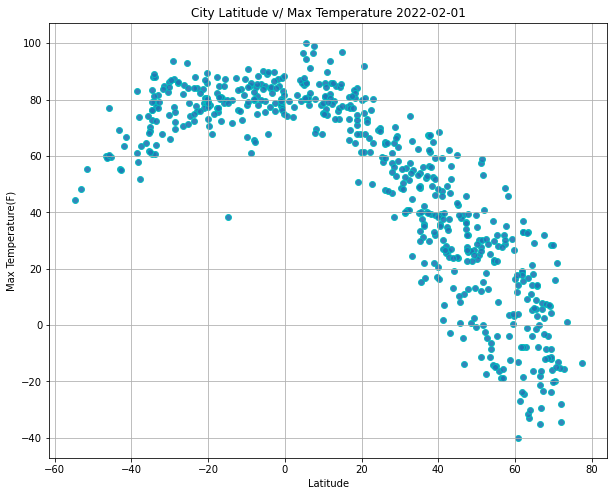

In [14]:
date_time = datetime.date(datetime.now())
#create scatter plot
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'c', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f"City Latitude v/ Max Temperature {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_v_temp.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

The below scatter plot shows the relationship between Humidity % v/ Latitude. From looking at the data plotted it appears that humidity is distributed on both sides of the equator. 

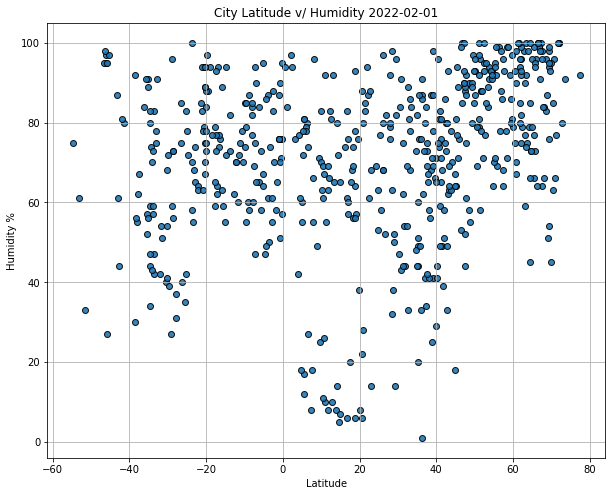

In [15]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude v/ Humidity {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_v_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

The below scatter plot shows the relationship between latitude and the city cloudiness. There appears to be no difference in cloudiness based on latitude of city. 

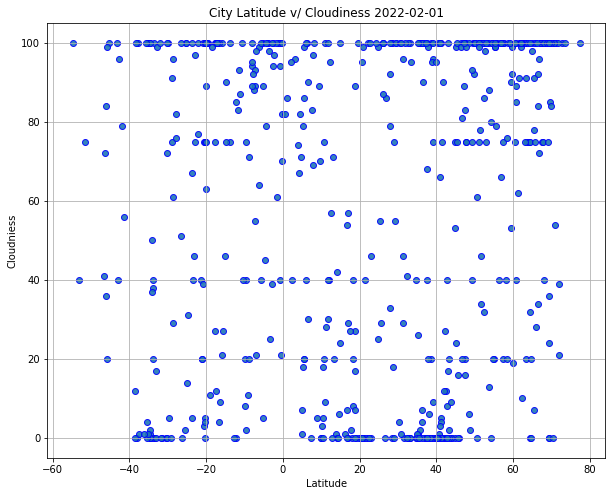

In [16]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'b', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Cloudniess")
plt.title(f"City Latitude v/ Cloudiness {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_v_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

The below scatter plot shows the relationship between latitude and wind speed. It appears that wind speed increases for cities farther from the equator. 

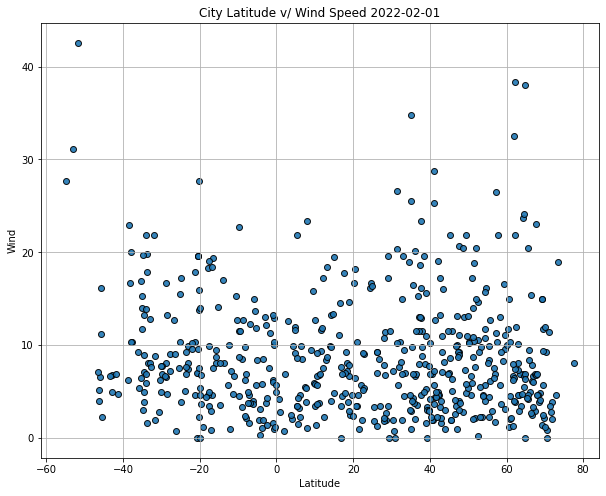

In [17]:
x_values = city_df["Lat"]
y_values = city_df["Wind"]
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title(f"City Latitude v/ Wind Speed {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_v_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [18]:
#dataframes for north & south
northern_hemisphere = city_df.loc[city_df["Lat"] >= 0]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The P-Value is: 4.6418235242326554e-129
The R-Value is: -0.8823221735228702
The r-squared is: 0.7784924178901219


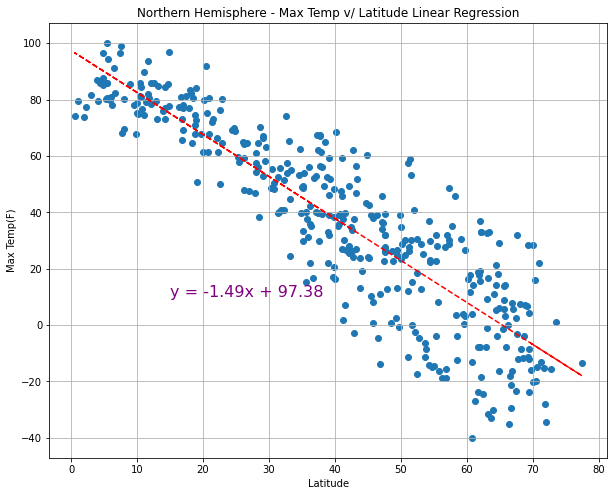

In [19]:
#Linear Regression Plots for North

x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

# plot for northern hemisphere - max temp v/ latitude linear regression

fig1,ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(15,10),fontsize=16,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title(f"Northern Hemisphere - Max Temp v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/north_hemisphere_maxtemp_latitude_LR", bbox_inches = "tight")
plt.show()

The above plot suggests that as we move farther away from the equator the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The P-Value is: 8.725988071046206e-14
The R-Value is: 0.5162311704334415
The r-squared is: 0.2664946213270809


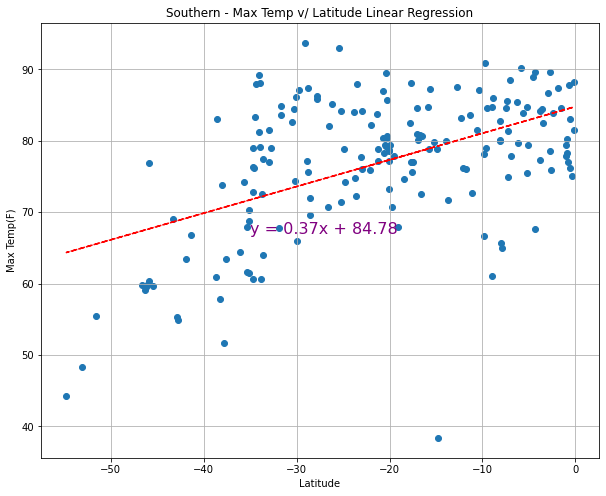

In [20]:
#Linear Regression Plots for South

x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

# plot for southern hemisphere - max temp v/ latitude linear regression
fig1,ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(-35,67),fontsize=16,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Southern - Max Temp v/ Latitude Linear Regression")
plt.grid()
#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/south_hemisphere_maxtemp_latitude_LR" ,bbox_inches = "tight")
plt.show()

Looking at the above there is not a strong correlation between between Max Temp and Latitude in the Southern Citites. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The P-Value is: 4.024358495879095e-22
The R-Value is: 0.4630537503355791
The r-squared is: 0.21441877569984483


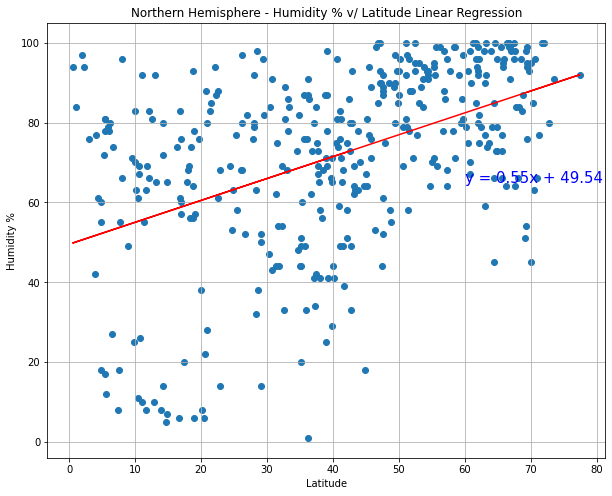

In [21]:
# Northern Hemisphere - %Humidity v/ %Humidity Latitude Linear Regression
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,65),fontsize=15,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere - Humidity % v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/north_hemisphere_humidity_latitude_LR", bbox_inches = "tight")
plt.show()

Not a strong correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The P-Value is: 0.07860022446122898
The R-Value is: 0.13071648578794054
The r-squared is: 0.01708679965674886


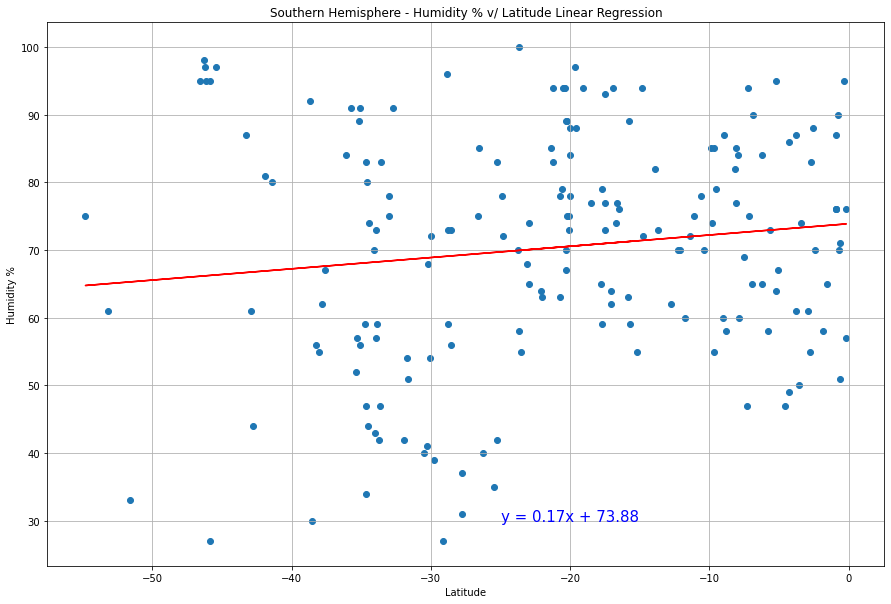

In [22]:
# Northern Hemisphere - %Humidity v/ Latitude Linear Regression
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 30),fontsize=15,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Humidity % v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/south_hemisphere_humidity_latitude_LR", bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The P-Value is: 2.7813124135344964e-09
The R-Value is: 0.29520062807071956
The r-squared is: 0.0871434108133473


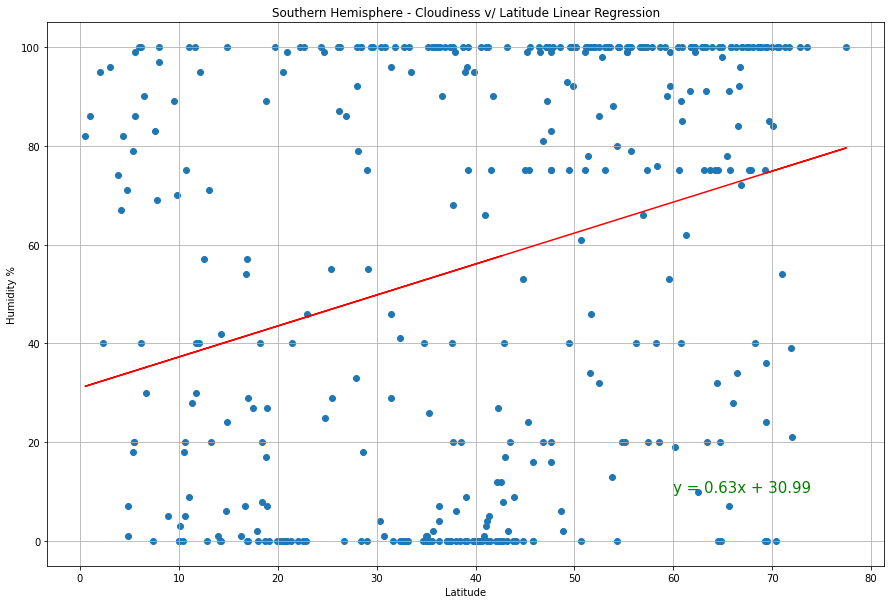

In [23]:
# Northern Hemisphere - Cloudiness v/ Latitude Linear Regression
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60, 10),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Cloudiness v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/north_hemisphere_cloudiness_latitude_LR", bbox_inches = "tight")
plt.show()

Almost 0 correlation on the above plot. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The P-Value is: 0.0015855202765783984
The R-Value is: 0.23251261455187375
The r-squared is: 0.05406211592574821


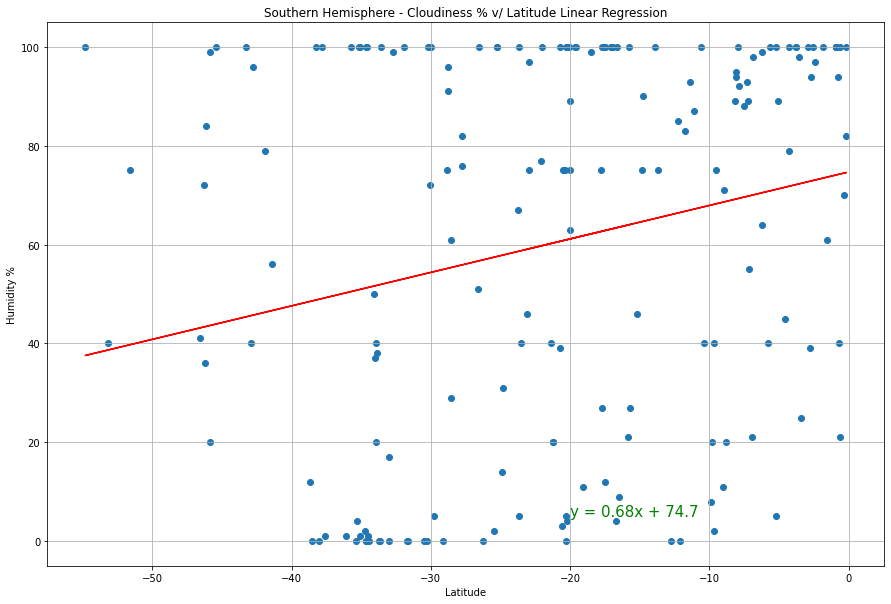

In [24]:
# Southern Hemisphere - Cloudiness v/ Latitude Linear Regression
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 5),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Cloudiness % v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/south_hemisphere_cloudiness_latitude_LR", bbox_inches = "tight")
plt.show()

Almost 0 correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The P-Value is: 0.4679696172431167
The R-Value is: 0.03685745024818136
The r-squared is: 0.001358471638797164


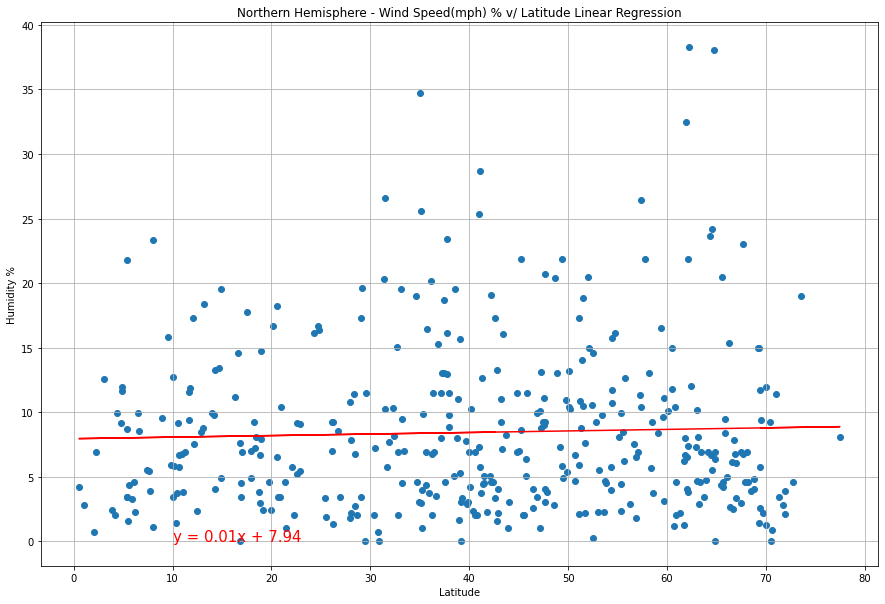

In [25]:
# Northern Hemisphere - Wind Speed v/ Latitude Linear Regression
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere - Wind Speed(mph) % v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/north_hemisphere_cloudiness_latitude_LR", bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The P-Value is: 5.3119572811758107e-05
The R-Value is: -0.29491454380390403
The r-squared is: 0.08697458814706482


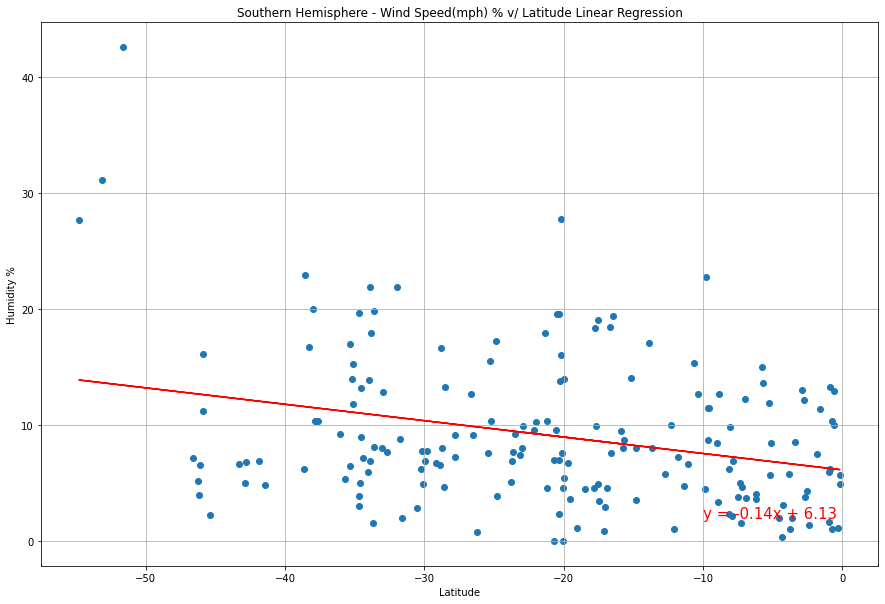

In [26]:
# Southern Hemisphere - Wind Speed v/ Latitude Linear Regression
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10, 2),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Wind Speed(mph) % v/ Latitude Linear Regression")

plt.grid()

#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("../output_data/south_hemisphere_cloudiness_latitude_LR", bbox_inches = "tight")
plt.show()